<a href="https://colab.research.google.com/github/CooperFinn/Python-Tutorial/blob/master/Data%20Visualization%20with%20Python/2.AreaPlots%2CHistograms%20and%20BarPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align=center><font size = 5>Area Plots, Histograms, and Bar Plots</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [Downloading and Prepping Data](#2)<br>
2. [Area Plots](#6) <br>
3. [Histograms](#8) <br>
4. [Bar Charts](#10) <br>
</div>
<hr>

##1.Downloading and Prepping Data 

Toolkits: Pandas, Numpy and Matplotlib

Dataset: [Immigration to Canada from 1980 to 2013](https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx)

In [0]:
# import primary modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# download the dataset and read it into a pandas dataframe
df=pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)



In [39]:
# take a look at the first five items 
df.head()


,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [40]:
# find out how many entries there are in our dataset
df.shape

(195, 43)

In [0]:
# clean up the dataset to remove columns that are not informative to us for visualization
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

In [42]:
# take a look at the first five items 
df.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [43]:
# rename some of the columns
df.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
# view the first 5 elements
df.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [44]:
# examine the types of the column labels
all(isinstance(column,str) for column in df.columns)

False

In [45]:
# change them all to string type
df.columns=list(map(str,df.columns))
# check the column label's types
all(isinstance(column,str) for column in df.columns)

True

In [46]:
# set the country name as index for quickly looking up countries using .loc method
df.set_index('Country',inplace=True)
# view the first 5 elements
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [47]:
# add total column
df['Total']=df.sum(axis=1)
# view the first 5 elements
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [48]:
# view the dimension of the data
df.shape

(195, 38)

In [49]:
# create a list of years from 1980-2013
years=list(map(str,range(1980,2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

## 2.Area Plots

In [50]:
df.sort_values(['Total'],ascending=False,axis=0,inplace=True)
print(df['Total'])
# get the top 5 entries
df_top5=df.head()
# transpose the dataframe
df_top5= df_top5[years].transpose()
# view the top 5 rows
df_top5.head()

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Haiti                                          

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


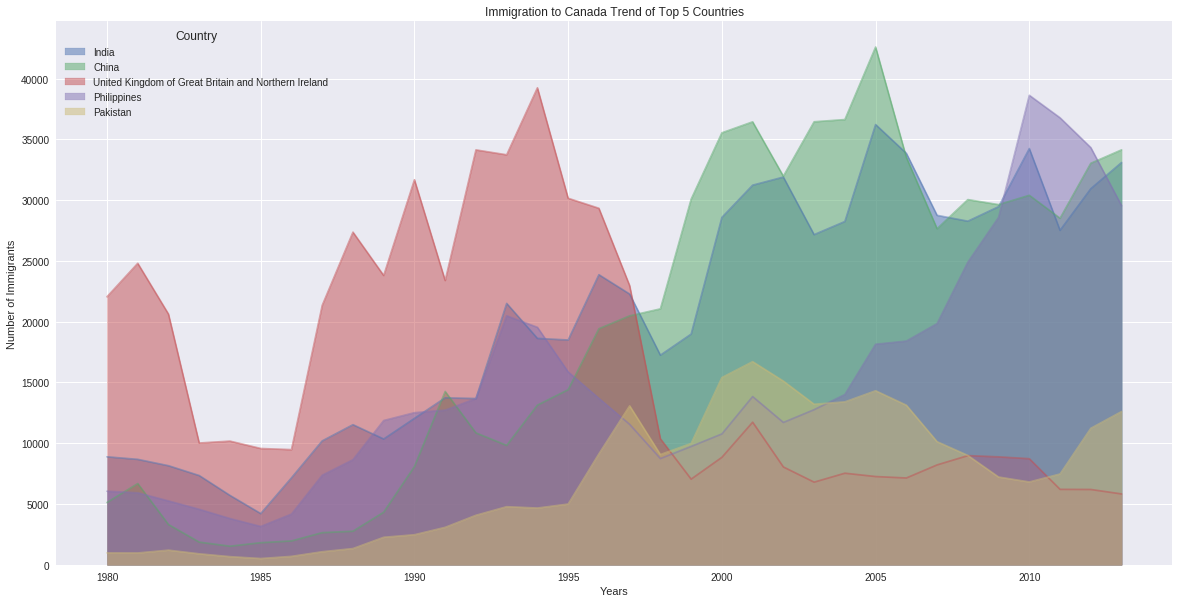

In [51]:
# change the index values of df_top5 to type integer for plotting
df_top5.index=df_top5.index.map(int)
# plot a area plot
df_top5.plot(kind='area',stacked=False,figsize=(20,10)) # produce an unstacked plot, pass stacked=False
plt.title('Immigration to Canada Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

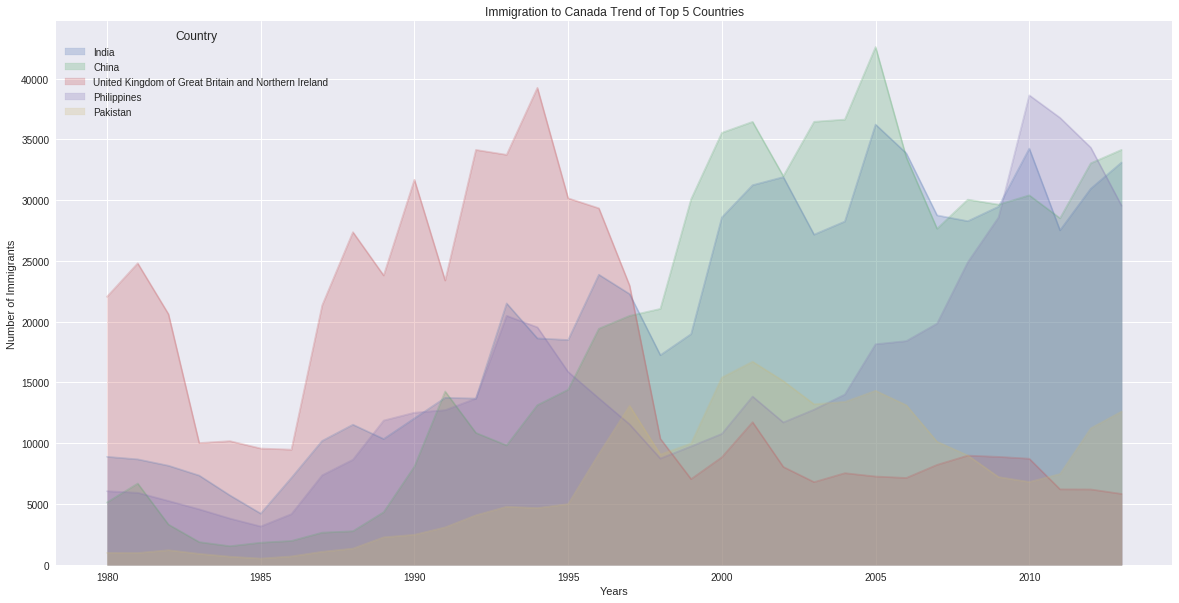

In [52]:
# modify the alpha value 
df_top5.plot(kind='area', 
             alpha=0.25,#default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immigration to Canada Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()

Text(0.5, 0, 'Years')

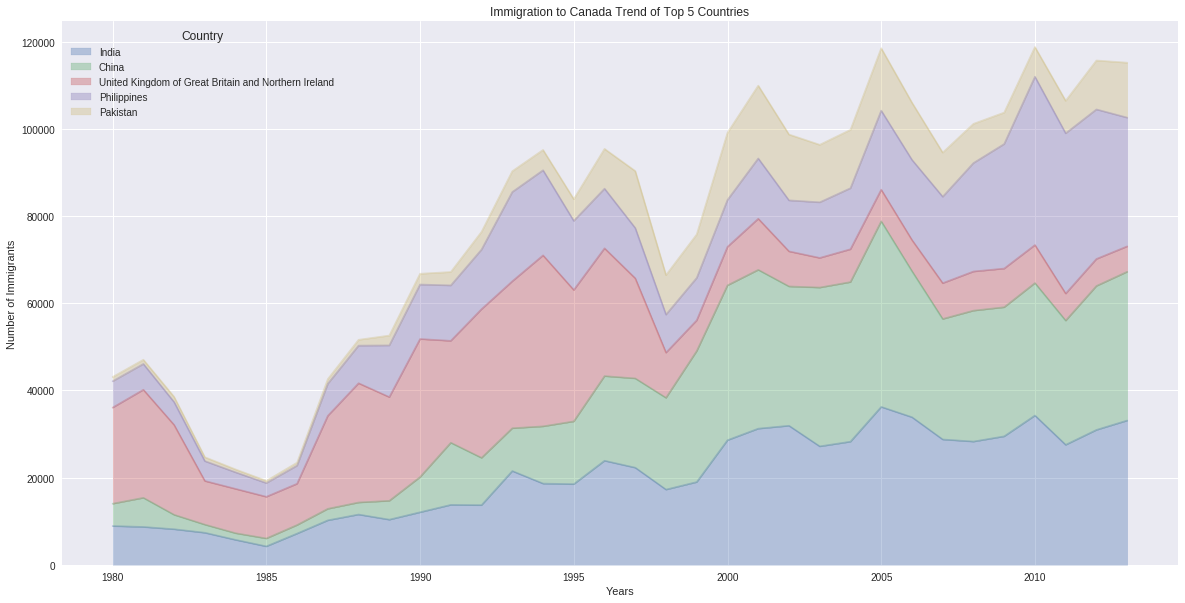

In [53]:
# use the artist layer to manipulate advanced aspects of the plots
ax = df_top5.plot(kind='area', alpha=0.35, figsize=(20, 10))

ax.set_title('Immigration to Canada Trend of Top 5 Countries')
ax.set_ylabel('Number of Immigrants')
ax.set_xlabel('Years')

##3.Histograms

###Question1: What is the frequency distribution of the number (population) of new immigrants from the various countries to Canada in 2013?

In [54]:
# view the 2013 data
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [55]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


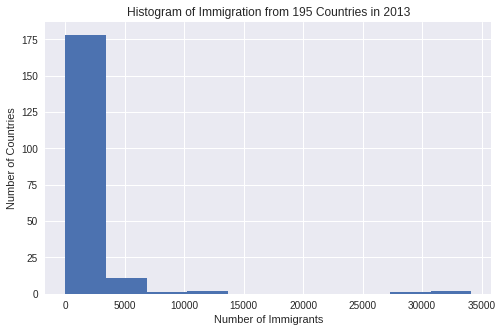

In [56]:
df['2013'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Immigration from 195 Countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants') 

plt.show()

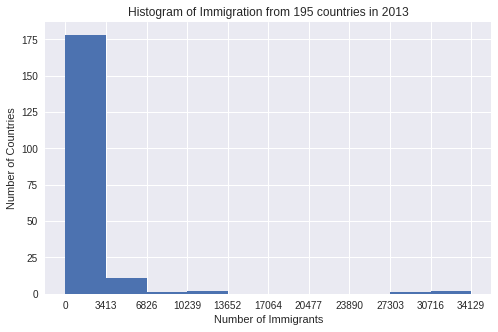

In [57]:
# pass in a xticks keyword that contains the list of the bin sizes
count, bin_edges = np.histogram(df['2013'])

df['2013'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') 
plt.ylabel('Number of Countries') 
plt.xlabel('Number of Immigrants') 

plt.show()

###Question2: What is the immigration distribution for Denmark, Norway, and Sweden for years 1980 - 2013?

In [58]:
df.loc[['Denmark','Norway','Sweden'],years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,272,293,299,106,93,73,93,109,129,129,...,89,62,101,97,108,81,92,93,94,81
Norway,116,77,106,51,31,54,56,80,73,76,...,73,57,53,73,66,75,46,49,53,59
Sweden,281,308,222,176,128,158,187,198,171,182,...,129,205,139,193,165,167,159,134,140,140


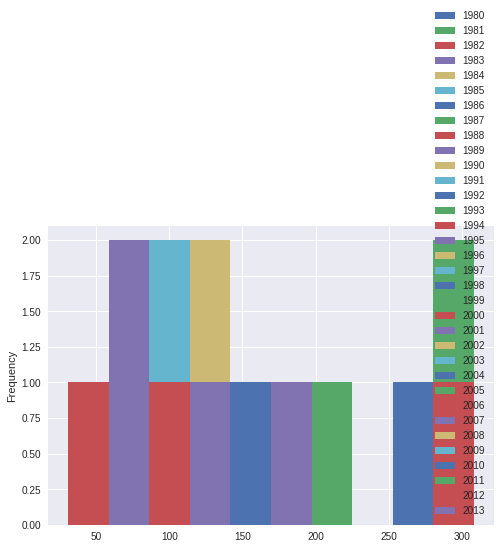

In [59]:
# generate histogram
# some_data.plot(kind='type_plot', ...) is equivalent to some_data.plot.type_plot(...)
df.loc[['Denmark','Norway','Sweden'],years].plot.hist()

In [60]:
# transpose dataframe
df_t = df.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


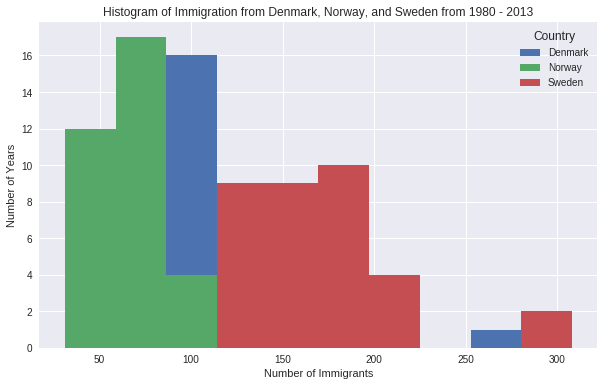

In [61]:
# generate histogram again
df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

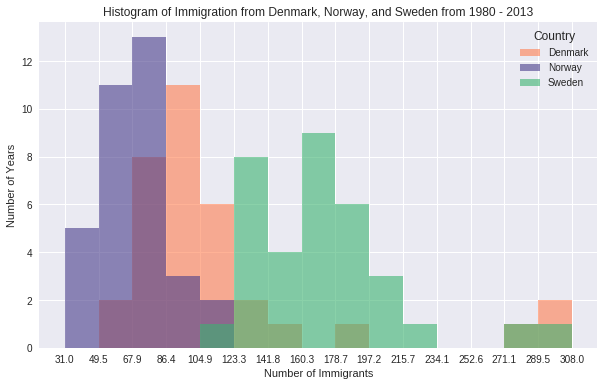

In [62]:
# make a few modifications to improve the impact and aesthetics of the previous plot:
# get the x-tick values
count, bin_edges = np.histogram(df_t, 15) # increase the bin size to 15

# un-stacked histogram
df_t.plot(kind ='hist', 
          figsize=(10, 6),
          bins=15,
          alpha=0.6,# set transparency to 60%
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen']# change the colors
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

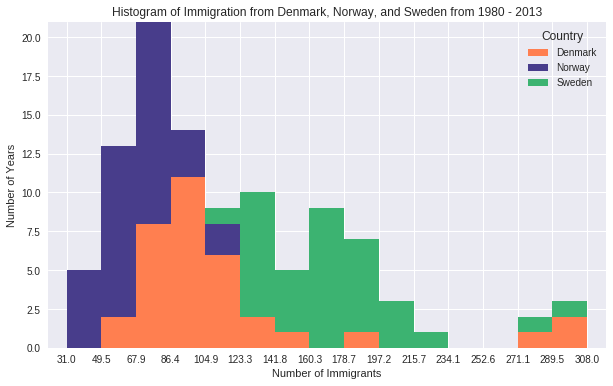

In [63]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,# If we do no want the plots to overlap each other, we can stack them
          xlim=(xmin, xmax)# adjust the min and max x-axis labels to remove the extra gap on the edges of the plot
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()

##4.Bar Plots

###Question1: Compare the number of Icelandic immigrants (country = 'Iceland') to Canada from year 1980 to 2013

In [64]:
# get the data
df_iceland=df.loc['Iceland',years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

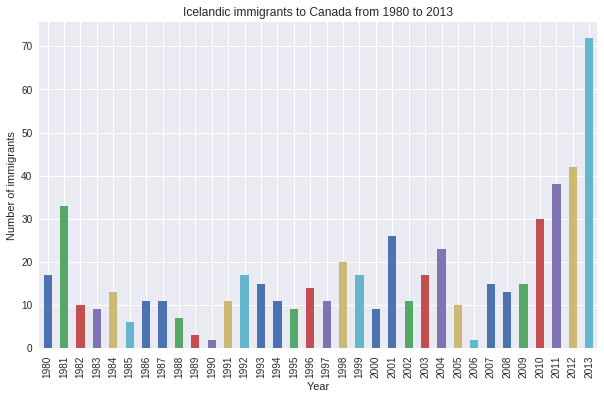

In [65]:
# plot data
df_iceland.plot(kind='bar',figsize=(10,6))# kind=bar creates a vertical bar plot

plt.xlabel('Year')
plt.ylabel('Number of immigrants')
plt.title('Icelandic immigrants to Canada from 1980 to 2013')

plt.show()

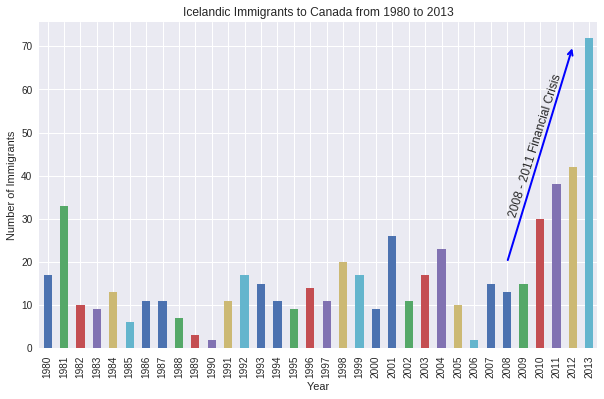

In [66]:
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2)
            )# arc3 is a straight line  #lw: Specifies the line width
# Annotate Text
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' aligned
            )

                                             # rotation: rotation angle of text in degrees (counter clockwise)
                                             # va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
                                             # ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]
plt.show()

###Question2: Using the scripting layter and the df dataset, create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries, for the period 1980 - 2013.

In [67]:
# create a horizontal bar plot
# Sort dataframe on 'Total' column (descending)
df.sort_values(by='Total', ascending=True, inplace=True)
print(df['Total'])
# Get the data pertaining to the top 15 countries
df_top15 = df['Total'].tail(15)
df_top15

Country
Palau                                                        1
Western Sahara                                               2
Marshall Islands                                             2
New Caledonia                                                5
San Marino                                                   5
American Samoa                                               6
Tuvalu                                                       8
Sao Tome and Principe                                       10
Vanuatu                                                     11
Kiribati                                                    15
Andorra                                                     15
Nauru                                                       18
Canada                                                      20
Monaco                                                      29
Maldives                                                    30
Liechtenstein                                  

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

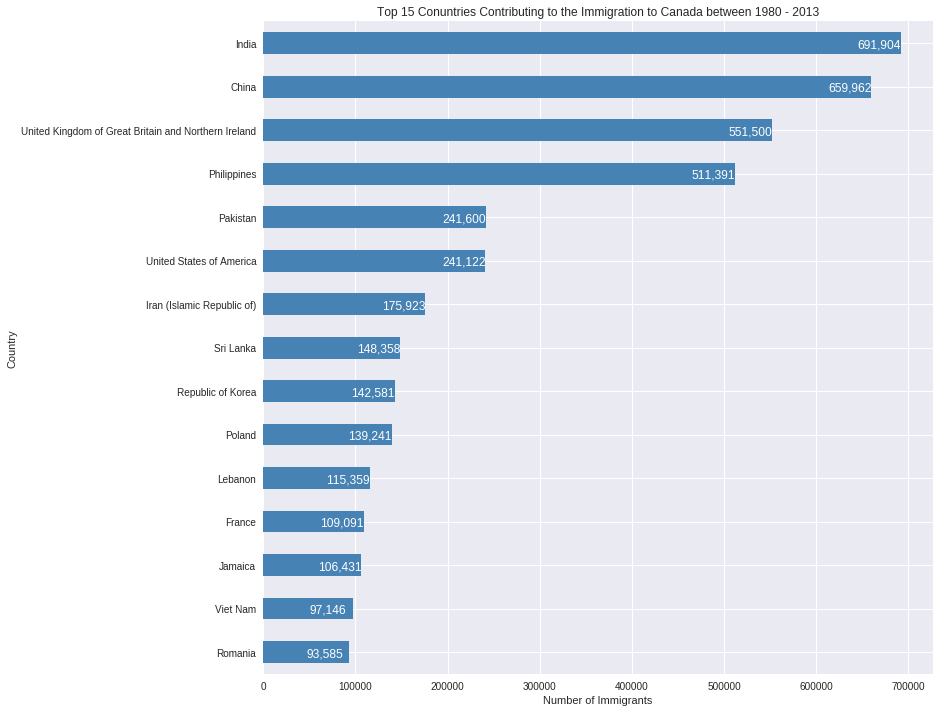

In [68]:
# kind=barh creates a horizontal bar plot
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')
# annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
# place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
plt.show()